# CENSUS INCOME PROJECT

- Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

- Prediction :

The prediction task is to determine whether a person makes over $50K a year.



In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [114]:
#Loading Dataset

df = pd.read_csv(r"E:\census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [67]:
#Checking Data Types and nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [68]:
df.shape

(32560, 15)

In [69]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [70]:
#Let's check coloumns value counts and uniqueness :

for i in df.columns:
    print (i,':',len(df[i].unique()))



Age : 73
Workclass : 9
Fnlwgt : 21647
Education : 16
Education_num : 16
Marital_status : 7
Occupation : 15
Relationship : 6
Race : 5
Sex : 2
Capital_gain : 119
Capital_loss : 92
Hours_per_week : 94
Native_country : 42
Income : 2


In [118]:
#Checking for categorical data

df.value_counts(['Workclass'])

Workclass        
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

In [72]:
#Checking for Value Counts

df.value_counts(['Education'])

Education    
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
dtype: int64

In [73]:
df.value_counts(['Marital_status'])

Marital_status        
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64

In [74]:
df.value_counts(['Occupation'])

Occupation        
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

In [75]:
df.value_counts(['Relationship'])

Relationship   
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
dtype: int64

In [76]:
df.value_counts(['Sex'])


Sex    
 Male      21789
 Female    10771
dtype: int64

In [77]:
df.value_counts(['Race'])

Race               
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
dtype: int64

In [86]:
df.value_counts(['Native_country'])

Native_country             
 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru     

In [79]:
df.value_counts(['Income'])

Income
 <=50K    24719
 >50K      7841
dtype: int64

In [80]:
#Checking for Statistics

df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [138]:
#Dropping Duplicate Values

df=df.drop_duplicates()

In [140]:
#As we can see there is no null values present in dataset but having unkown entry '?', 
#So we will convert it into missing value and then drop it.

df[df == ' ?'] = np.nan

In [141]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [158]:
df=df.dropna()

In [159]:
df.shape

(30138, 15)

# EXPLORATORY DATA ANALYSIS


- Univariate Analysis

<AxesSubplot:xlabel='Income', ylabel='count'>

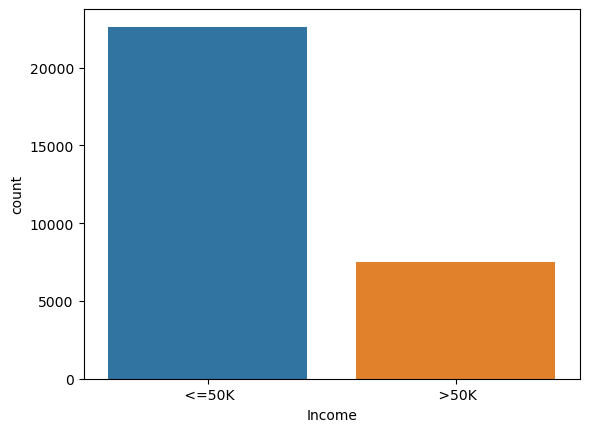

In [160]:
sns.countplot(x='Income',data=df)


- Count of people getting salary less than 50K is more.

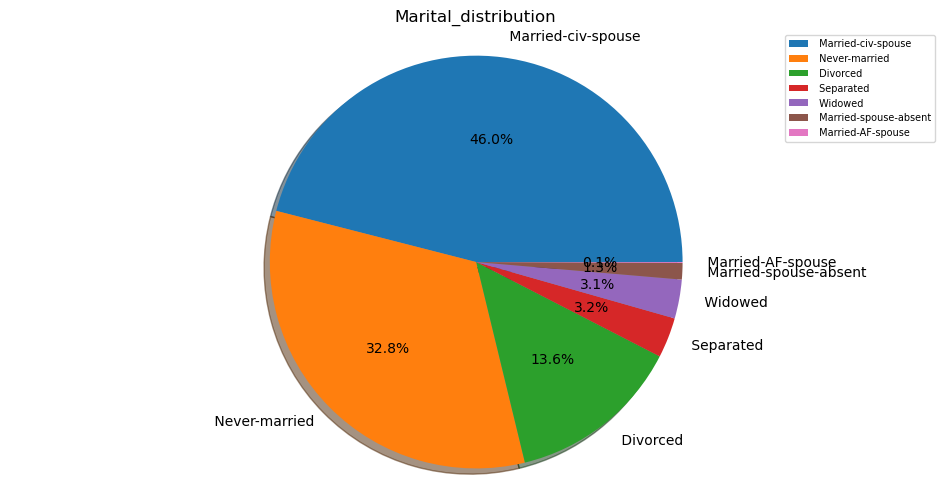

In [144]:
#Plotting pie Chart to check distribution of Marital Status

plt.figure(figsize=(12,6))
plt.pie(df['Marital_status'].value_counts(),labels=df['Marital_status'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Marital_distribution')
plt.legend()
plt.legend(prop={'size':7})
plt.axis('equal')
plt.show()

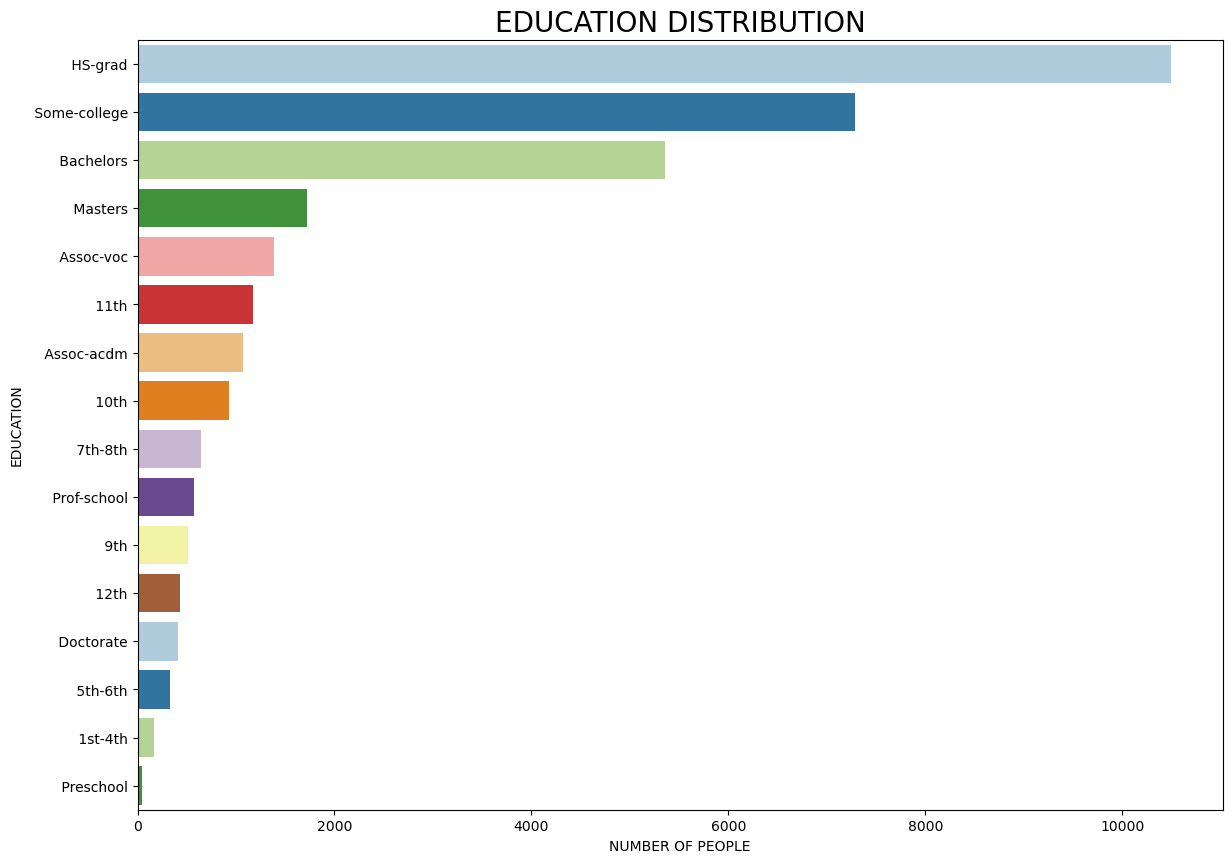

In [145]:
#Creating Barplot for education

educ=df['Education'].value_counts()
plt.figure(figsize=(14,10))
sns.barplot(educ.values,educ.index,palette='Paired')
plt.title('EDUCATION DISTRIBUTION',fontdict={'fontsize':20})
plt.xlabel('NUMBER OF PEOPLE')
plt.ylabel('EDUCATION')
plt.show()

- People with high school graduate contribute more in count in our dataset

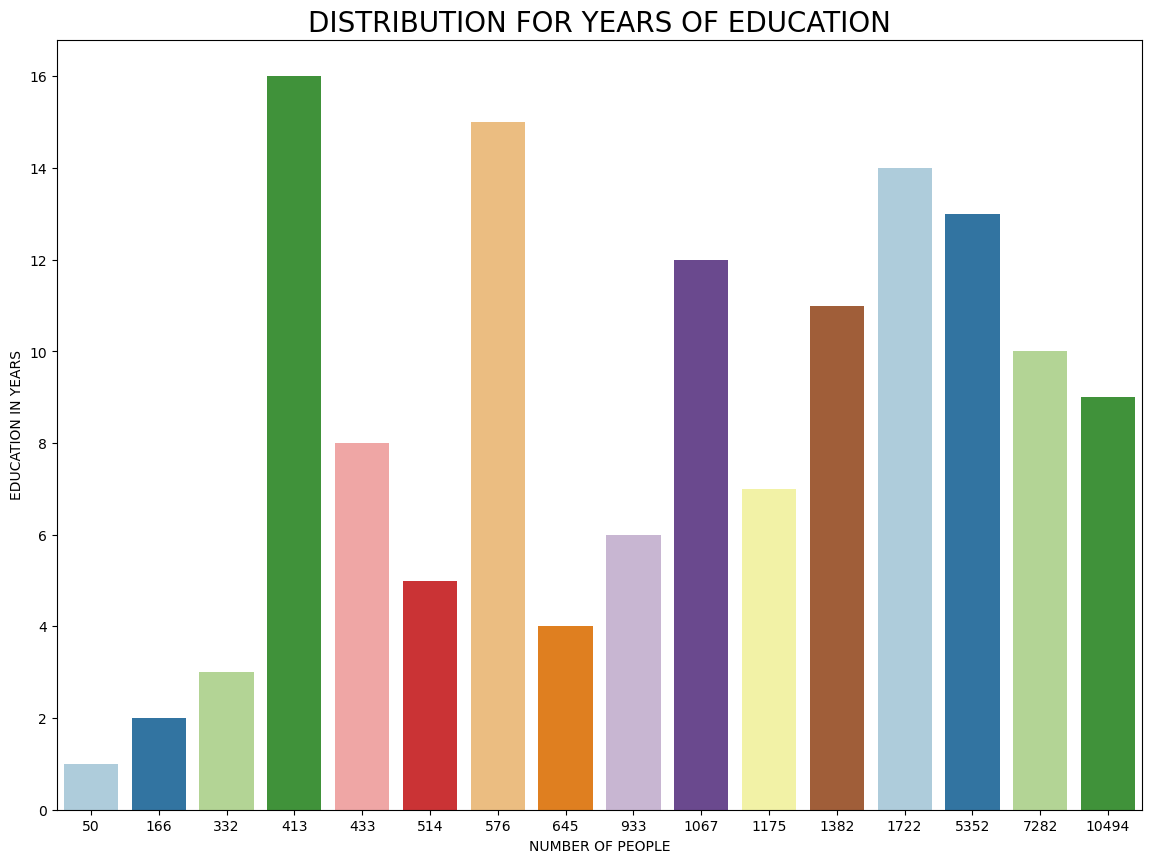

In [146]:
#For Years of Education

educt=df['Education_num'].value_counts()
plt.figure(figsize=(14,10))
sns.barplot(educt.values,educt.index,palette='Paired')
plt.title('DISTRIBUTION FOR YEARS OF EDUCATION',fontdict={'fontsize':20})
plt.xlabel('NUMBER OF PEOPLE')
plt.ylabel('EDUCATION IN YEARS')
plt.show()

- Max. years in education is 16.

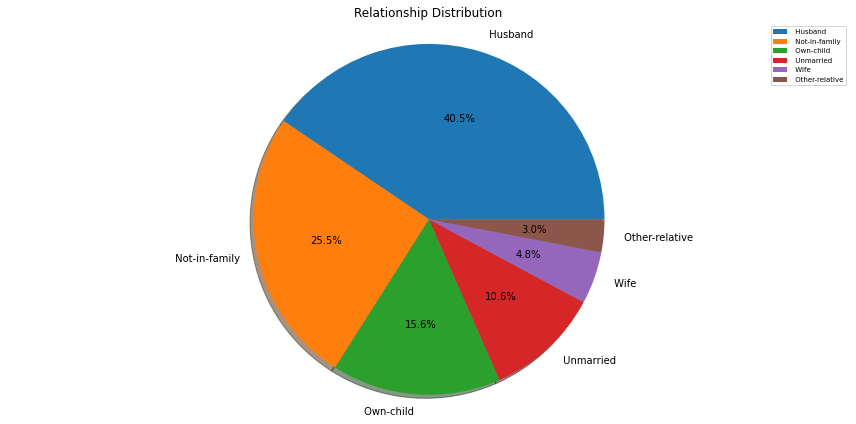

In [32]:
#For Relationship

plt.figure(figsize=(12,6))
plt.style.use('default')
plt.pie(df['Relationship'].value_counts(),labels=df['Relationship'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Relationship Distribution')
plt.legend()
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

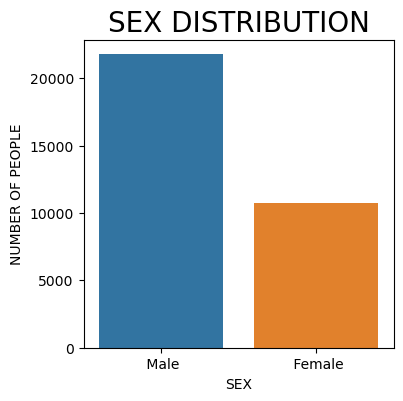

In [42]:
plt.figure(figsize=(4,4))
plt.title('SEX DISTRIBUTION',fontdict={'fontsize':20})
sns.barplot(df['Sex'].value_counts().index,df['Sex'].value_counts().values)
plt.xlabel('SEX')
plt.ylabel('NUMBER OF PEOPLE')
plt.show()

- Count for Male is more as compared to Female

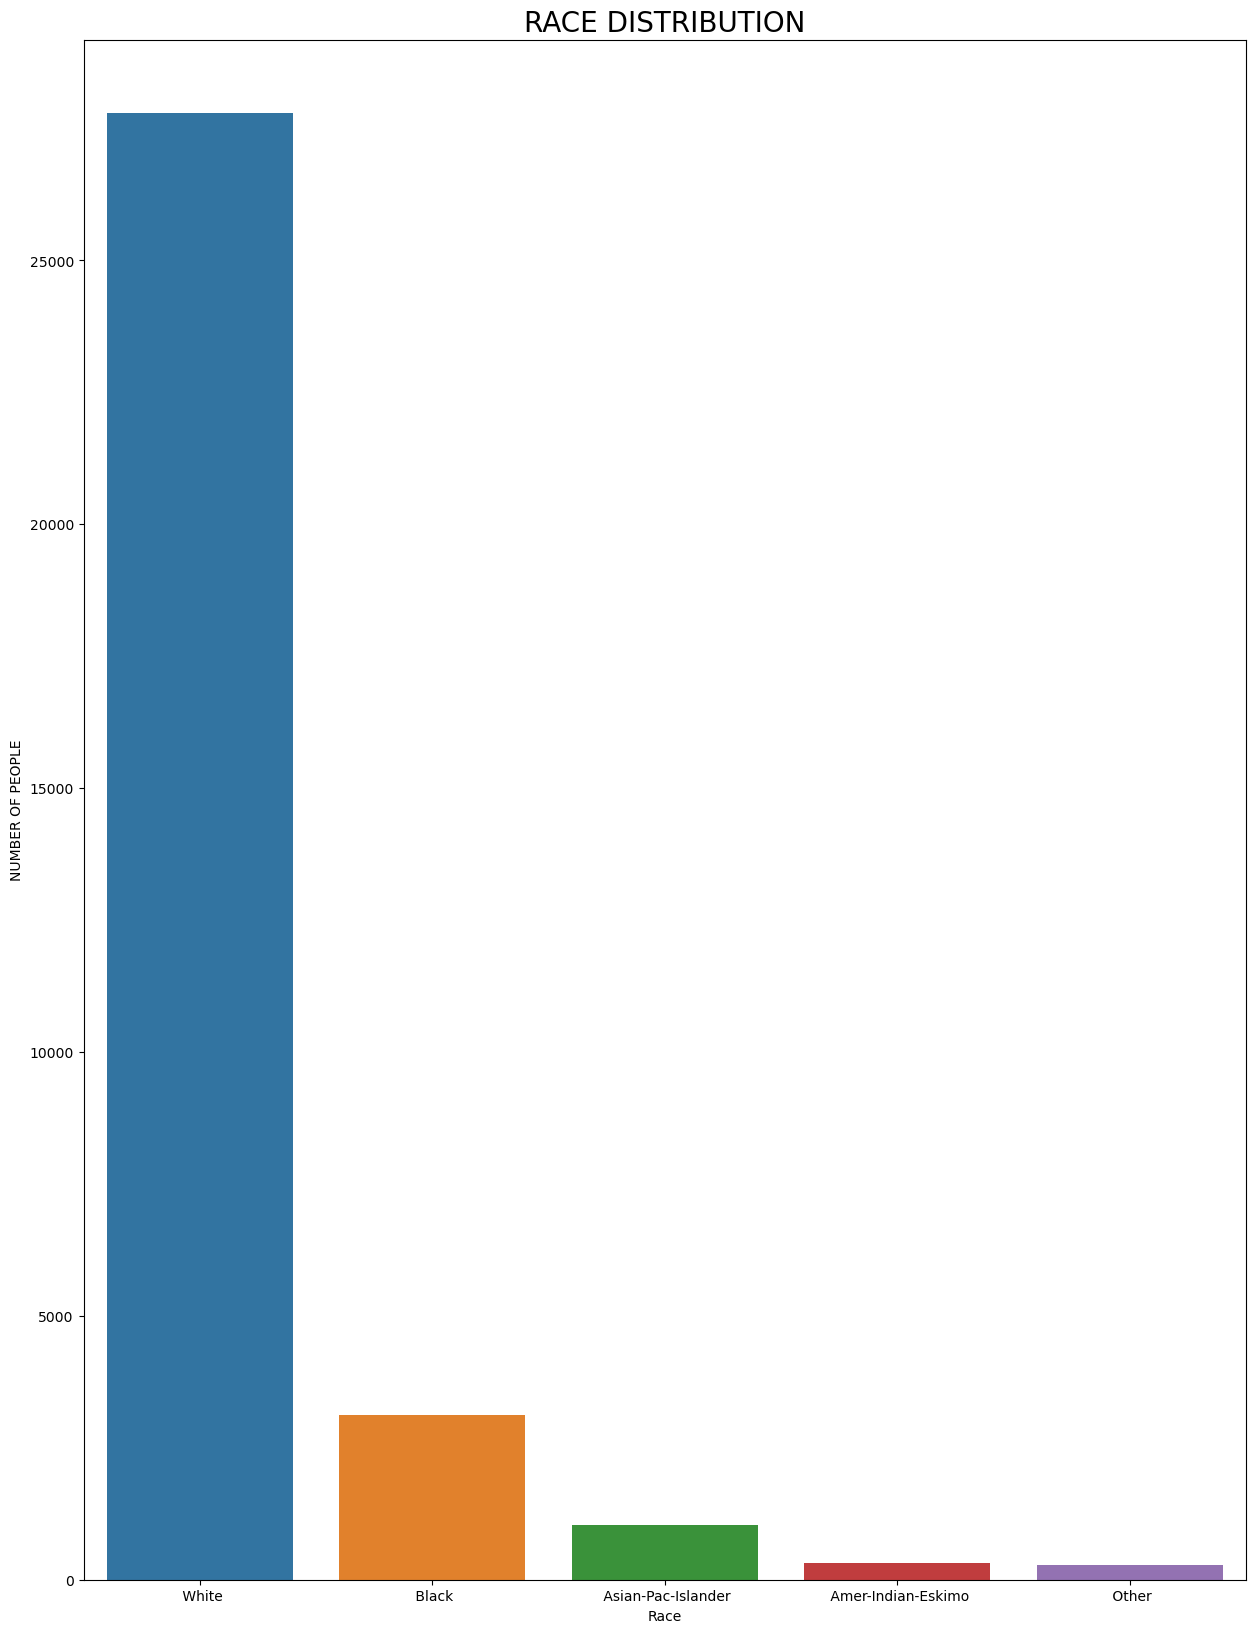

In [52]:
#For Race

plt.figure(figsize=(15,20))
plt.title('RACE DISTRIBUTION',fontdict={'fontsize':20})
sns.barplot(df['Race'].value_counts().index,df['Race'].value_counts().values)
plt.xlabel('Race')
plt.ylabel('NUMBER OF PEOPLE')
plt.show()


- Count of White colour people is more

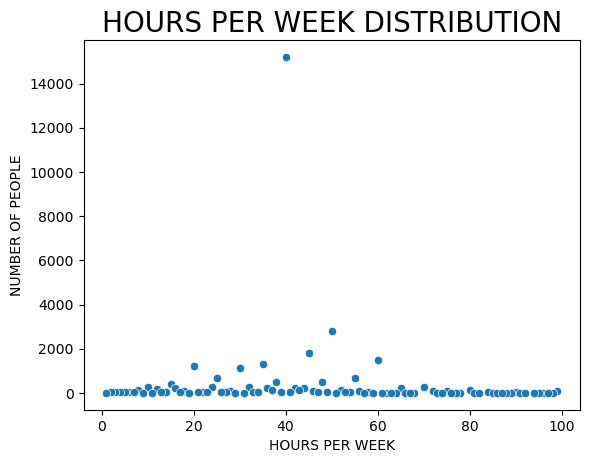

In [59]:
plt.title('HOURS PER WEEK DISTRIBUTION',fontdict={'fontsize':20})
sns.scatterplot(df['Hours_per_week'].value_counts().index,df['Hours_per_week'].value_counts().values)
plt.xlabel('HOURS PER WEEK')
plt.ylabel('NUMBER OF PEOPLE')
plt.show()

- Most number of people works 40 hours per week

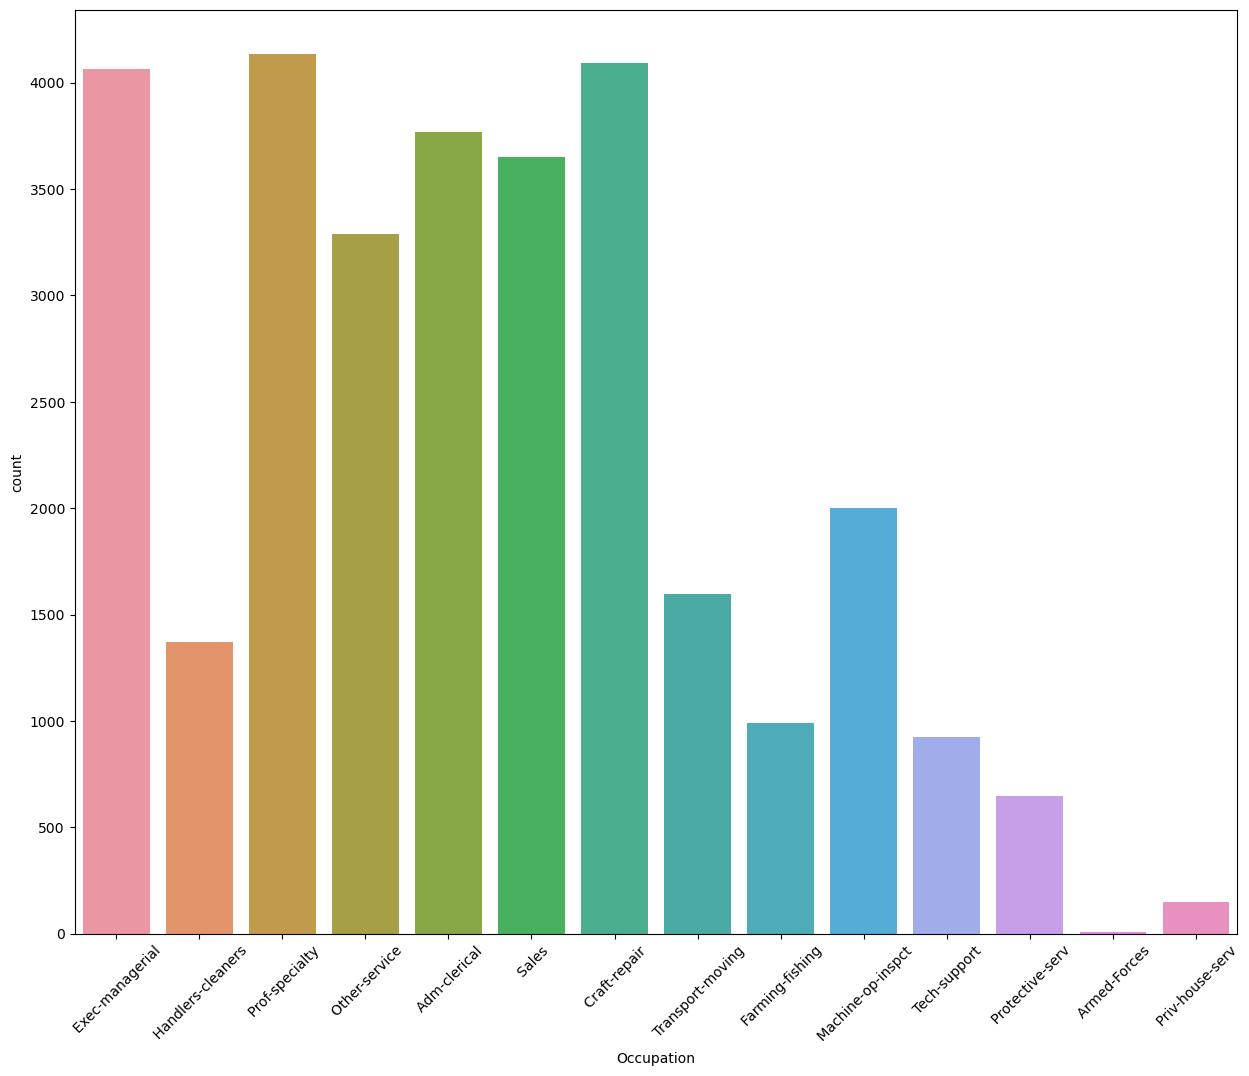

In [147]:
plt.figure(figsize=(15,12))
sns.countplot(x='Occupation',data=df)
plt.xticks(rotation=45)
plt.show()

# - Bivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Age'>

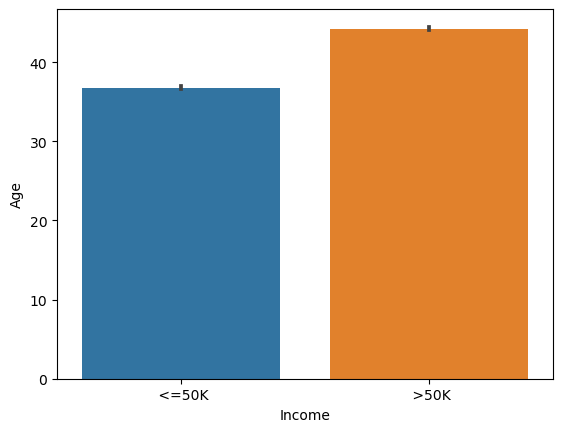

In [68]:
#AGE AND INCOME

sns.barplot(x='Income' , y='Age' , data=df )


- As Age increases,Salary Increases.Mostly,after 35yrs.

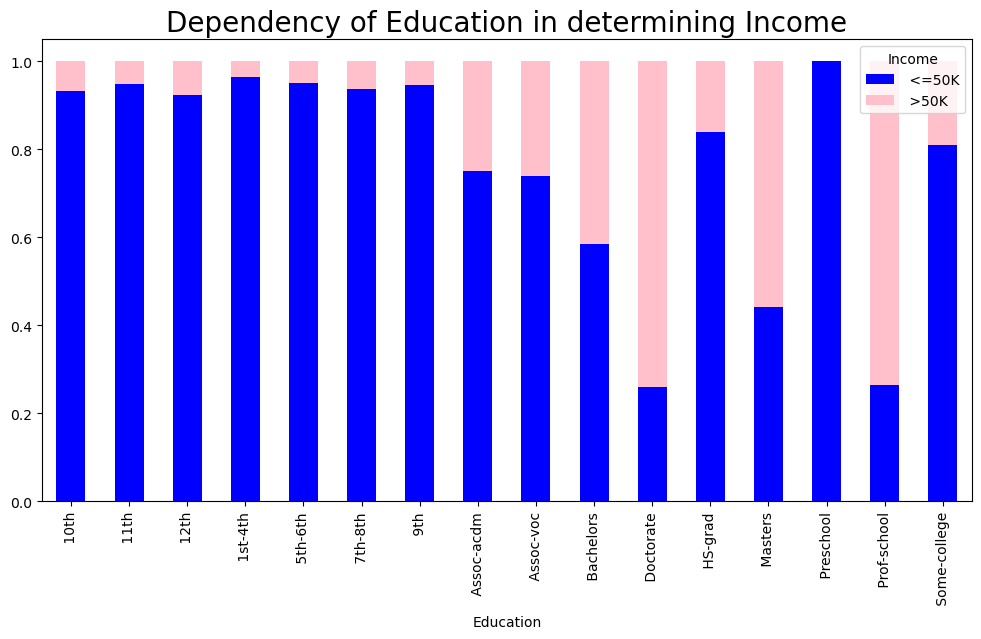

In [71]:
data=pd.crosstab(df['Education'], df['Income'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['blue', 'pink'], 
                                                figsize=(12,6))
plt.title('Dependency of Education in determining Income', fontsize=20)
plt.xlabel('Education')
plt.show()

### People who did there Bachelors,Masters earn more Income.
### People with  degree like Doctorate and pass out from professional schools are considered to be more valuable.

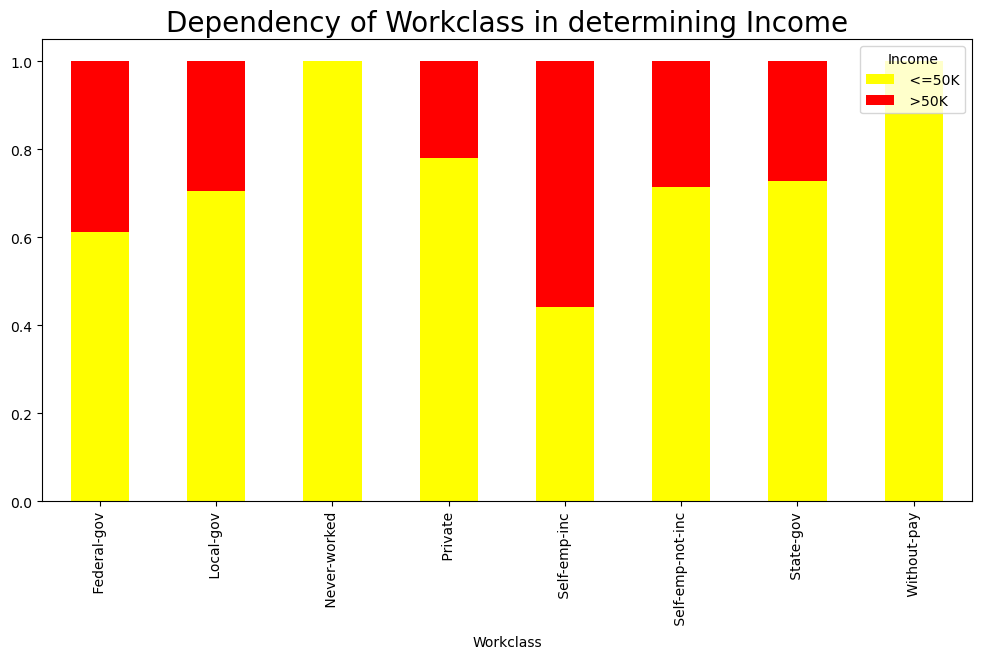

In [148]:
data=pd.crosstab(df['Workclass'], df['Income'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['yellow', 'red'], 
                                                figsize=(12,6))
plt.title('Dependency of Workclass in determining Income', fontsize=20)
plt.xlabel('Workclass')
plt.show()

#### INCOME IS GREATER IN SELF EMPLOYMENT

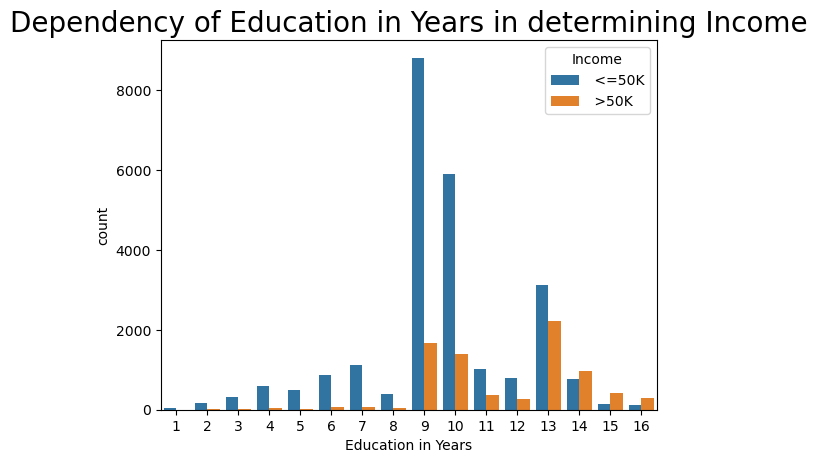

In [85]:
plt.figure()
sns.countplot(df['Education_num'],hue=df['Income'])
plt.title('Dependency of Education in Years in determining Income', fontsize=20)
plt.xlabel('Education in Years')
plt.xticks(rotation=0)
plt.show()

- People having 9-10 yrs of education is more.
- More the education more will be the Income

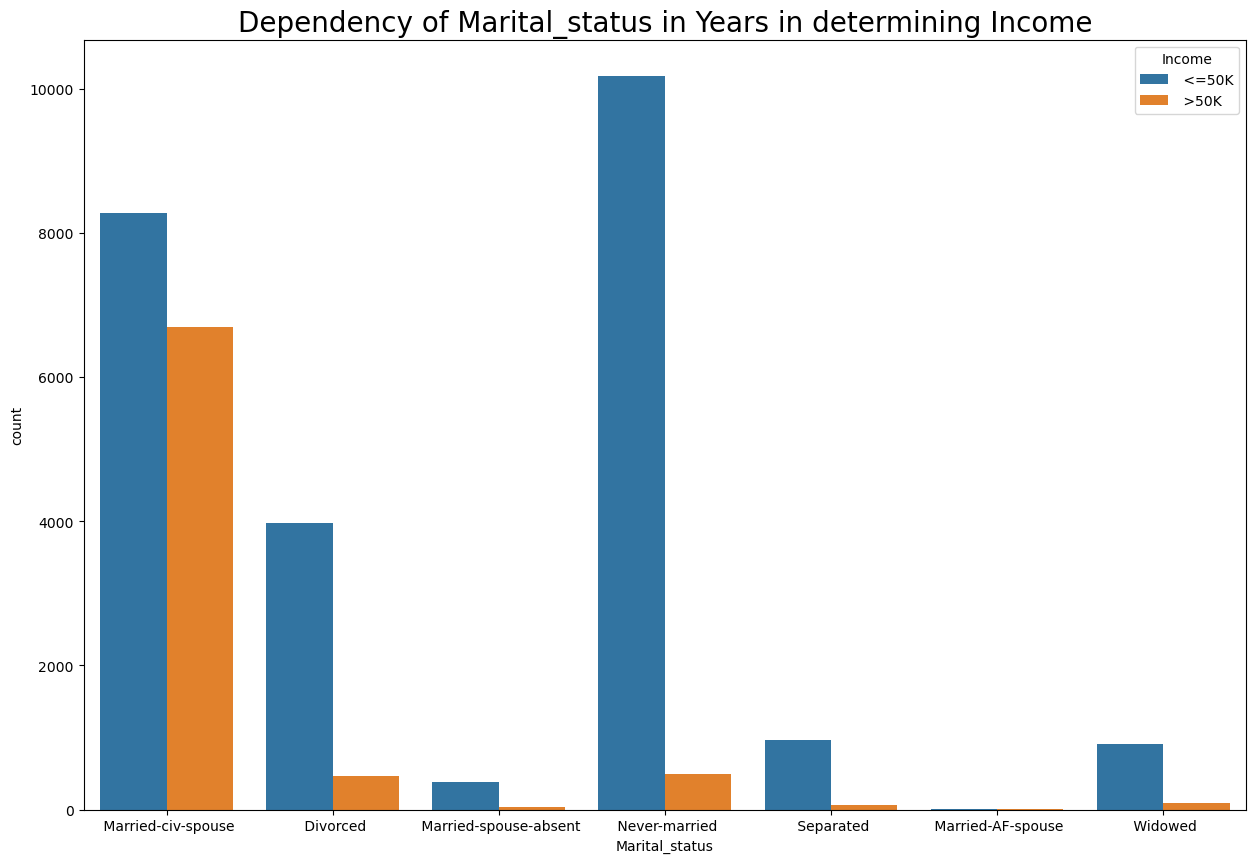

In [87]:
plt.figure(figsize=(15,10))
sns.countplot(df['Marital_status'],hue=df['Income'])
plt.title('Dependency of Marital_status in Years in determining Income', fontsize=20)
plt.xlabel('Marital_status')
plt.xticks(rotation=0)
plt.show()

- Married-civ-spouse Income and count is more as compared with others.

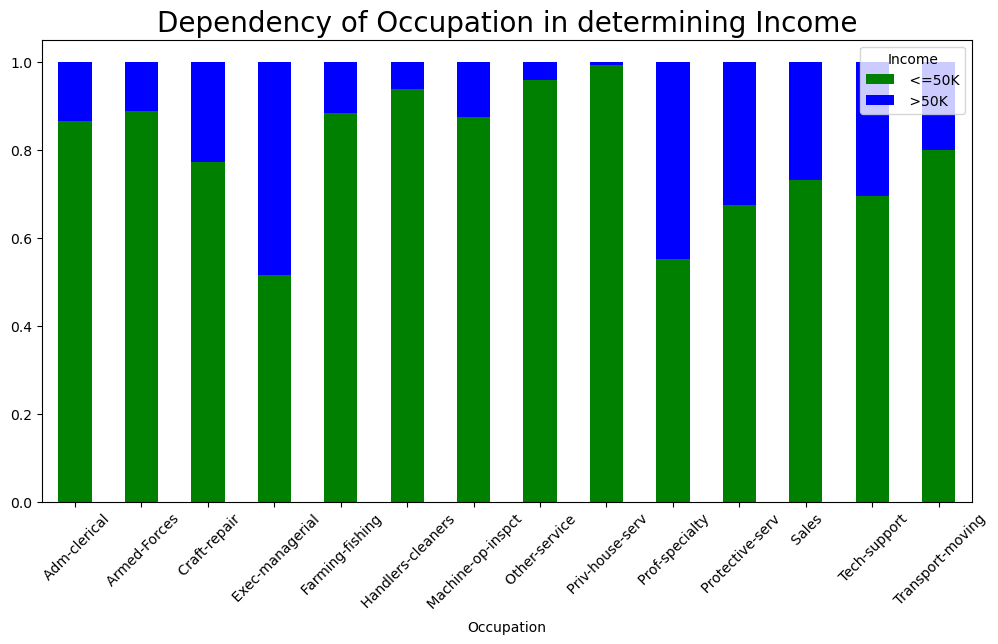

In [149]:
data=pd.crosstab(df['Occupation'], df['Income'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['Green', 'blue'], 
                                                figsize=(12,6))
plt.title('Dependency of Occupation in determining Income', fontsize=20)
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.show()

- Occupation like Excel Managerial,Professional specialty,Protective services generate more Income.

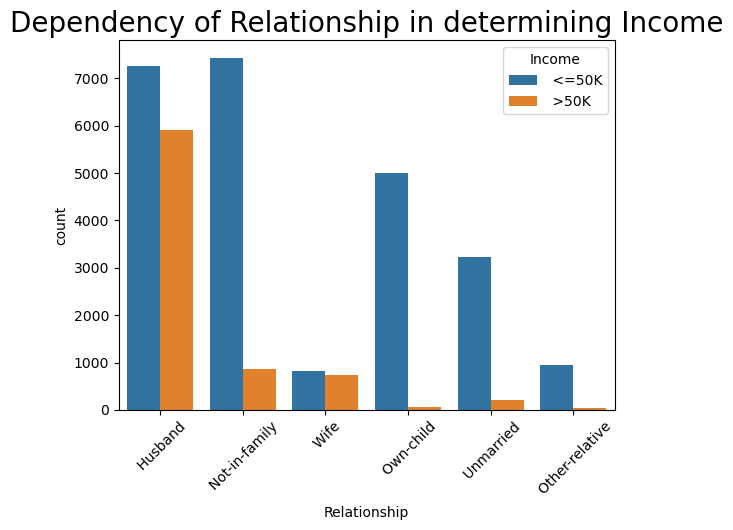

In [94]:
plt.figure()
sns.countplot(df['Relationship'],hue=df['Income'])
plt.title('Dependency of Relationship in determining Income', fontsize=20)
plt.xlabel('Relationship')
plt.xticks(rotation=45)
plt.show()

### Husband & Wife relationship is having higher dependency in more Income.

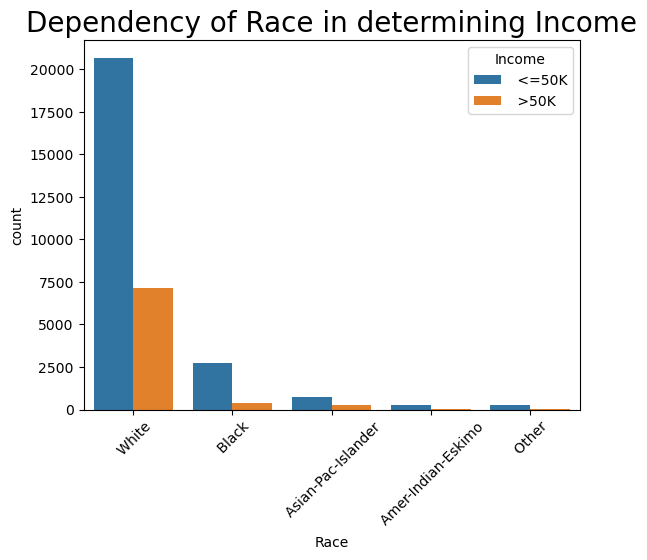

In [93]:
plt.figure()
sns.countplot(df['Race'],hue=df['Income'])
plt.title('Dependency of Race in determining Income', fontsize=20)
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.show()

### People with white skin tone having more benefits in higher income.

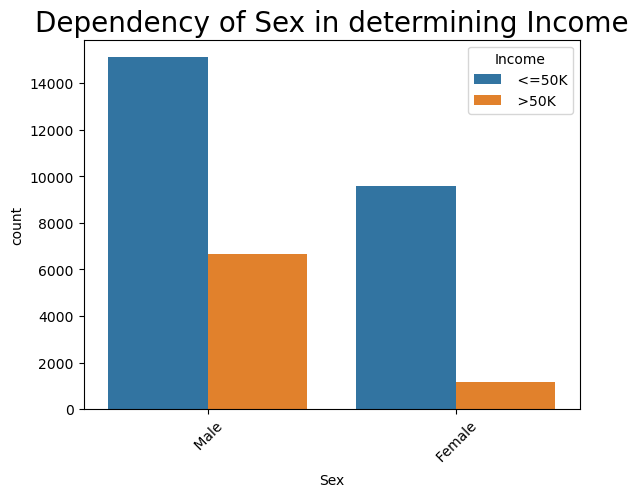

In [95]:
plt.figure()
sns.countplot(df['Sex'],hue=df['Income'])
plt.title('Dependency of Sex in determining Income', fontsize=20)
plt.xlabel('Sex')
plt.xticks(rotation=45)
plt.show()

### Count of Male Gender is more as compared to female.
### Male earns more Income

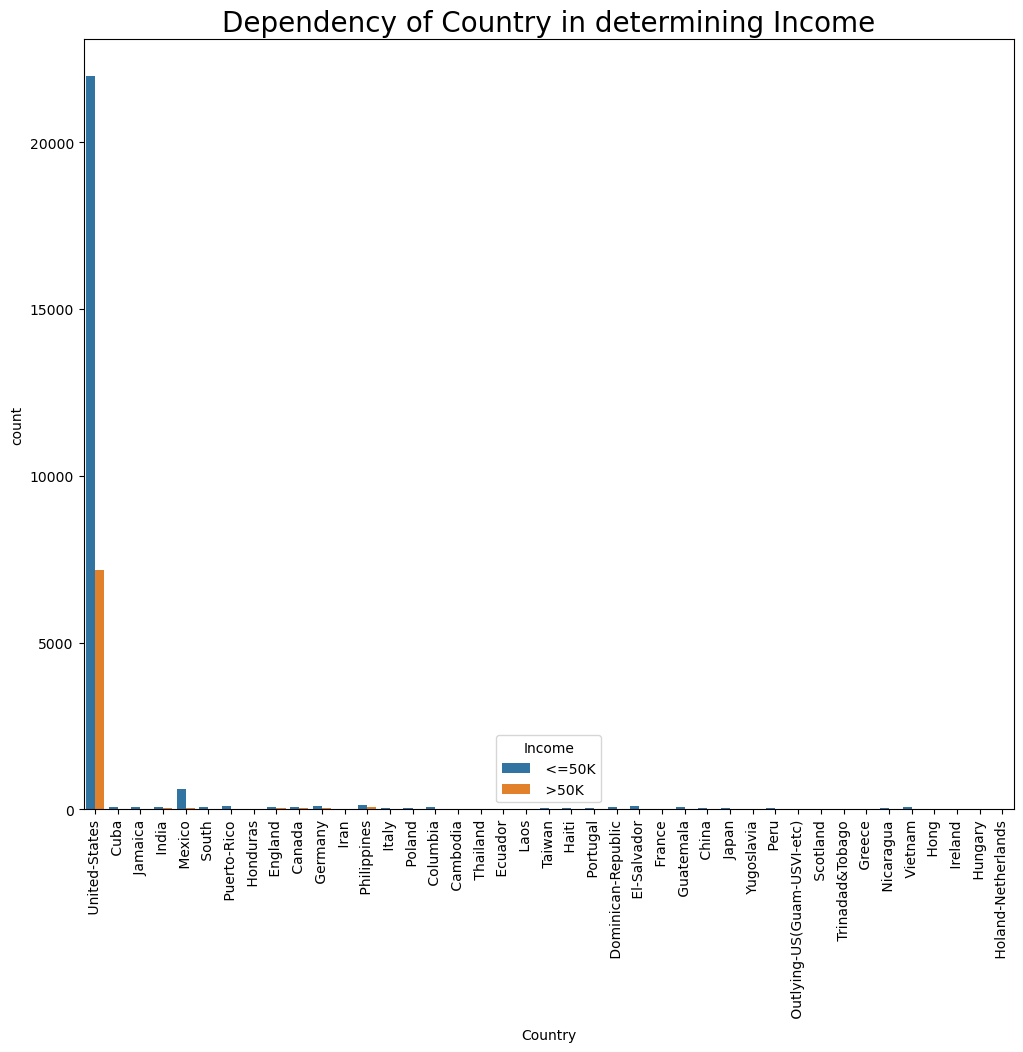

In [150]:
plt.figure(figsize=(12,10))
sns.countplot(df['Native_country'],hue=df['Income'])
plt.title('Dependency of Country in determining Income', fontsize=20)
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

- United States is having higher dependency in Income.Also, it is having highest count in our Dataset.

# DATA PREPROCESSING

In [162]:
#Encoding object data into integer

label_col = ['Workclass','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df[label_col]=df[label_col].apply(lambda x : label.fit_transform(x))

In [165]:
df=df.drop(columns=['Education'],axis=1)

#Dropping Education coloumn as it is already encoded in dataset with 'Education_num'

- Multivariate Analysis

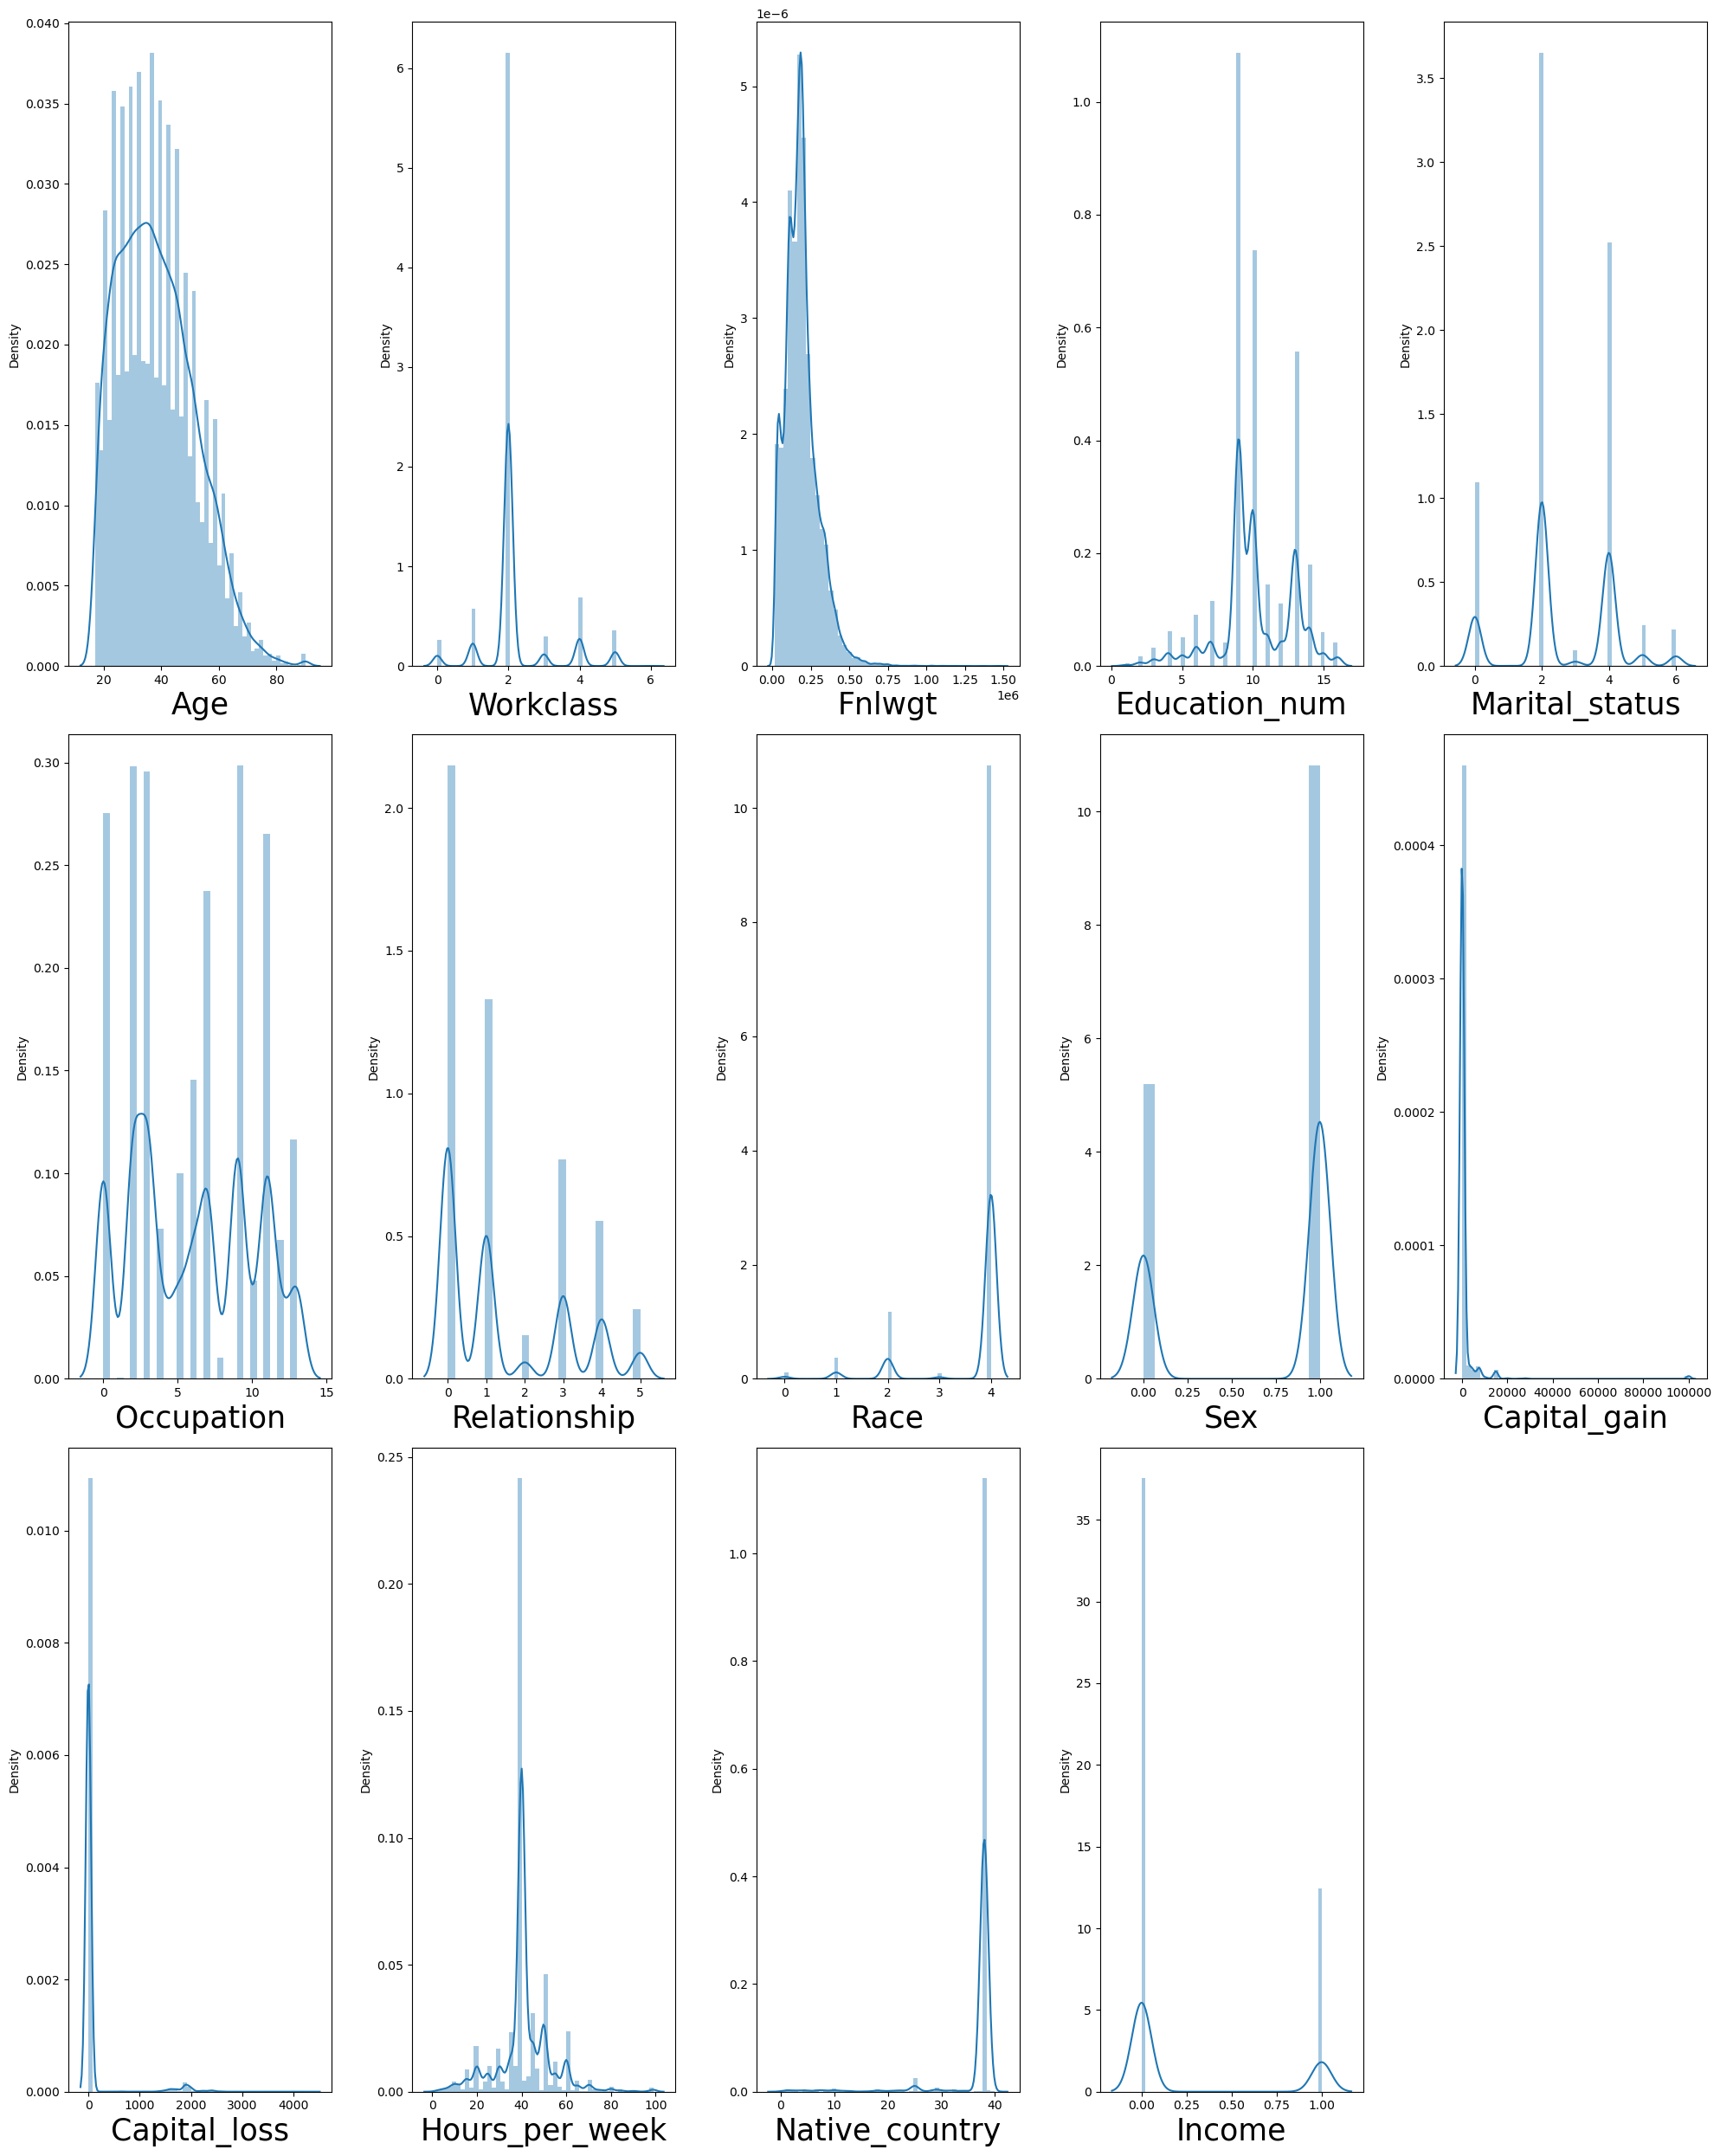

In [166]:
#Distribution Plot

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

- There is some skewness present in some of the features

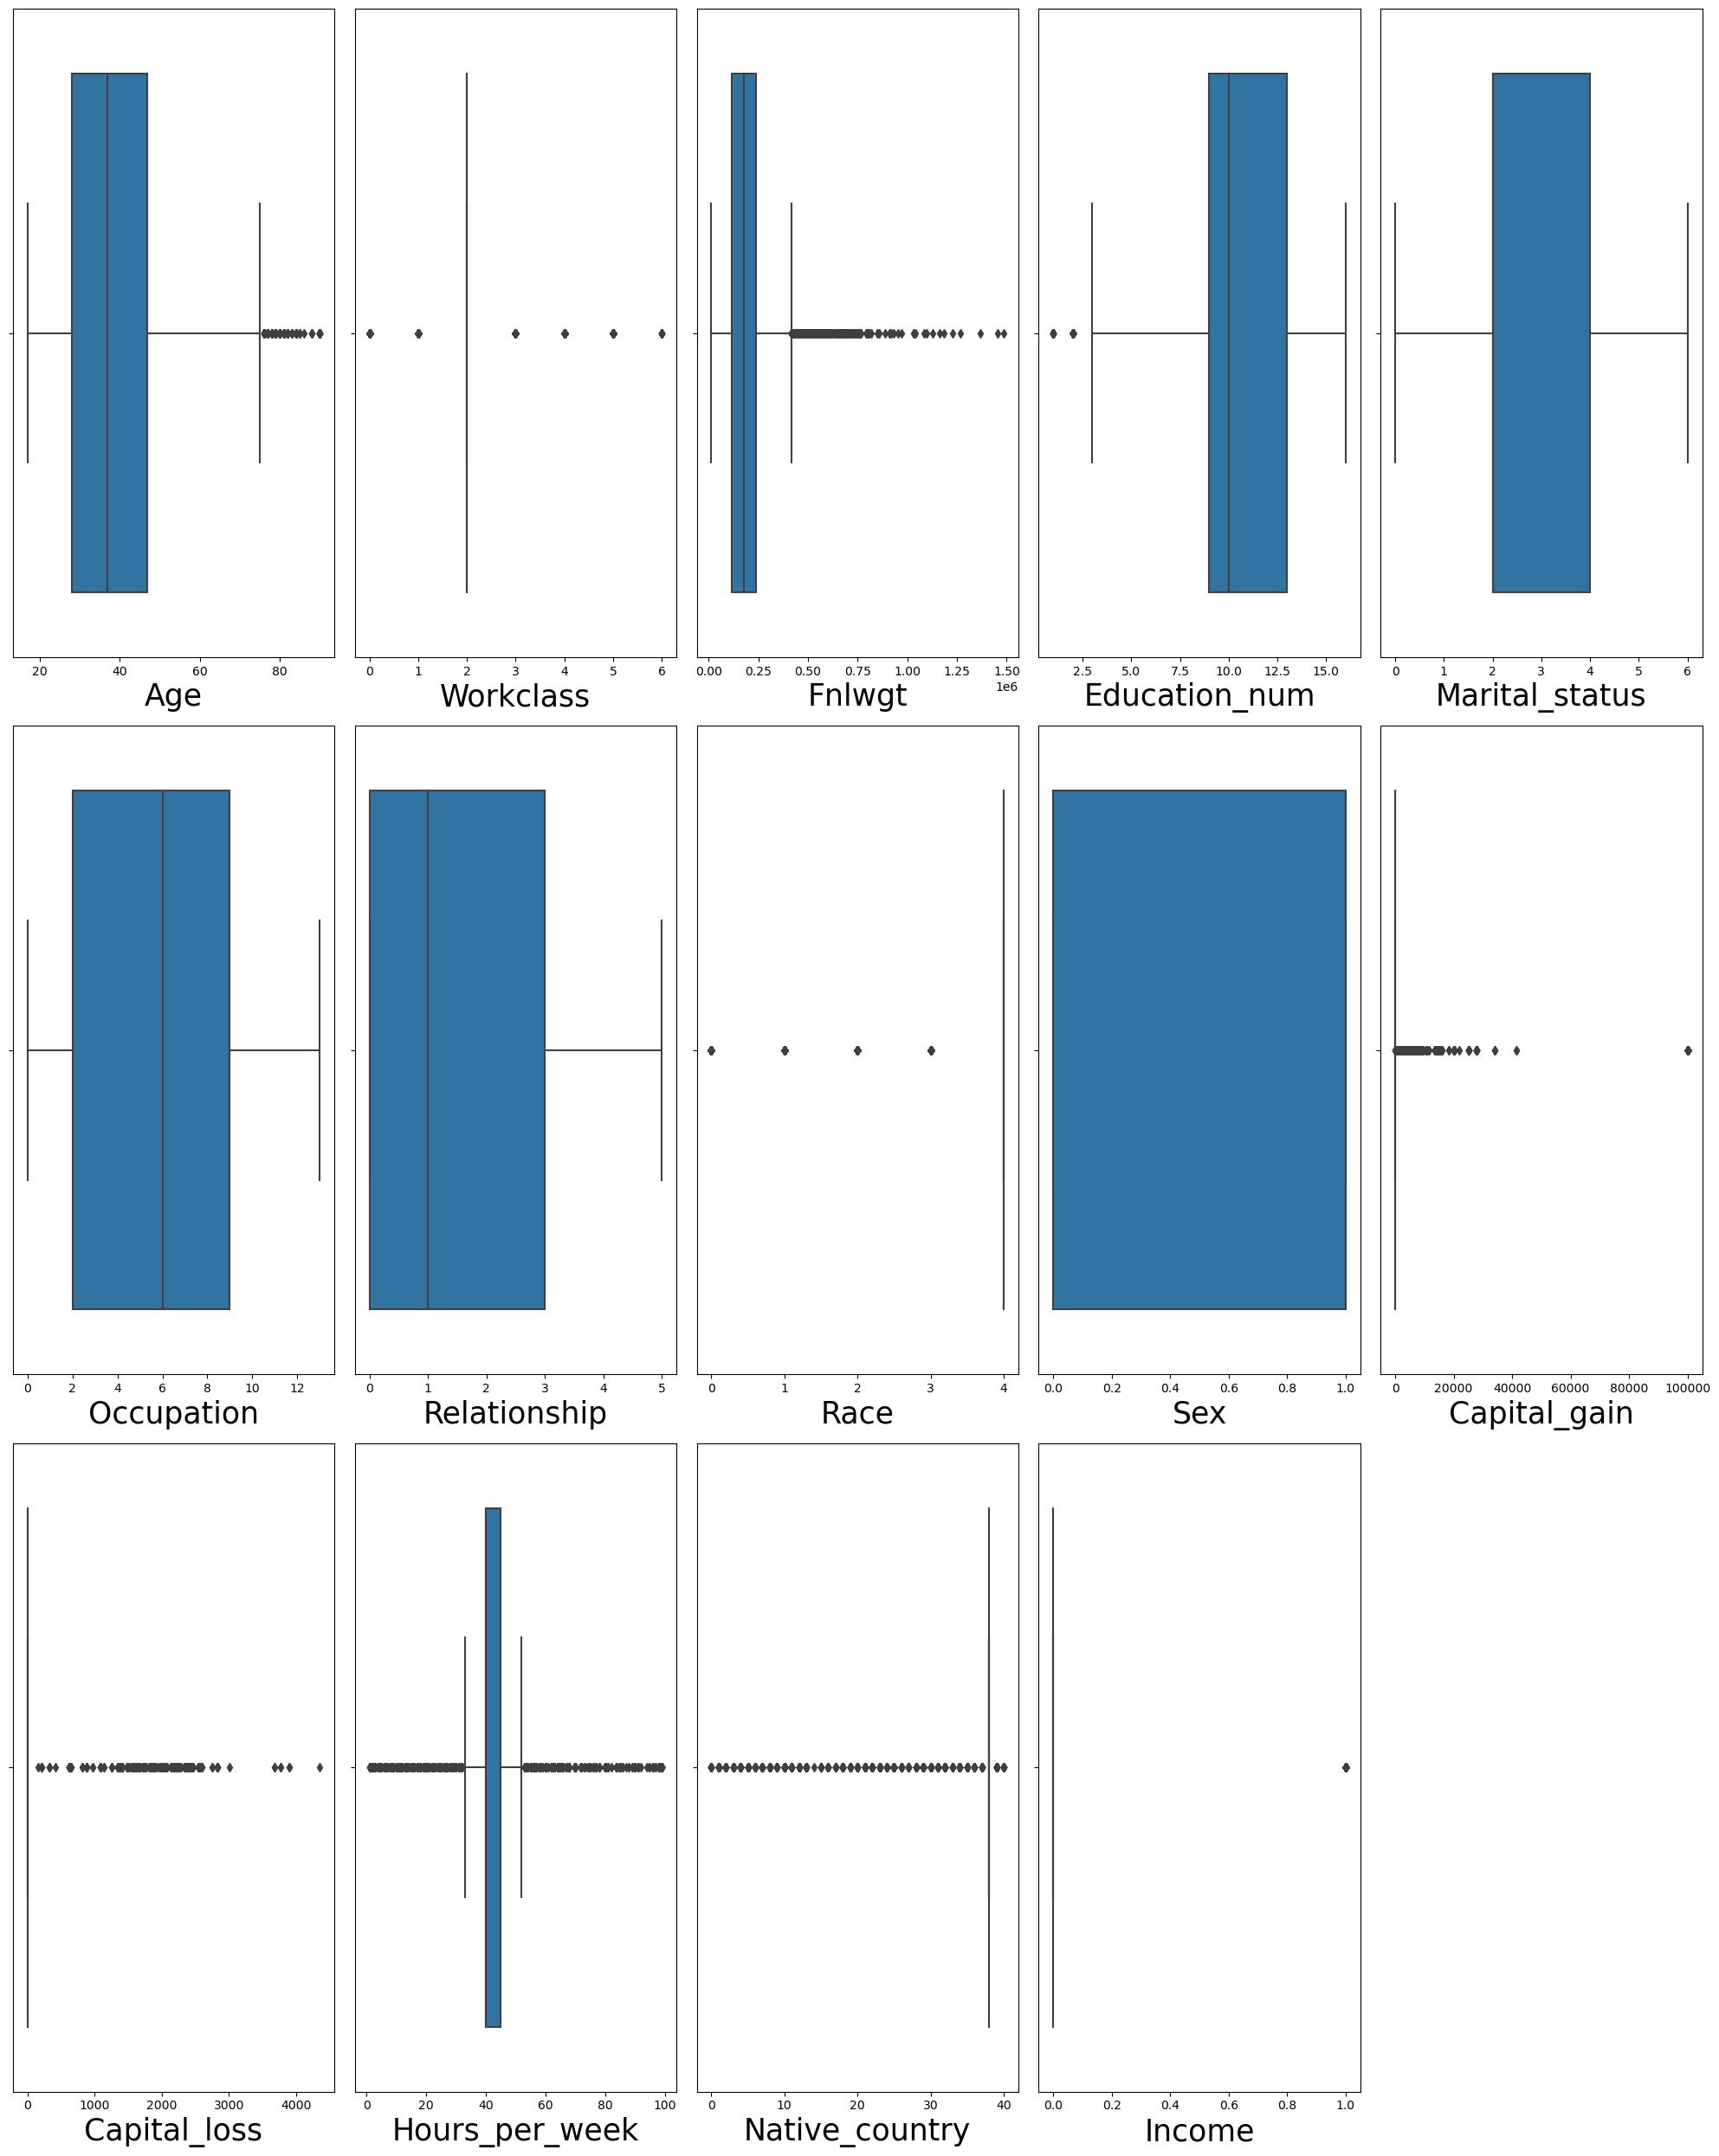

In [168]:
#Checking Outliers using Boxplot

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [169]:
df['Capital_gain'].value_counts()

0        27601
15024      337
7688       270
7298       240
99999      148
         ...  
401          1
22040        1
4931         1
1455         1
1639         1
Name: Capital_gain, Length: 118, dtype: int64

In [171]:
df['Capital_loss'].value_counts()

0       28711
1902      194
1977      162
1887      155
1848       50
        ...  
419         1
1411        1
1539        1
2472        1
2467        1
Name: Capital_loss, Length: 90, dtype: int64

- Dropping Both Columns as they contain 0 values in majority data points

In [172]:
df1 = df.drop(columns=['Capital_gain','Capital_loss'],axis=1)
df1.shape

(30138, 12)

In [173]:
#Removing Outliers in continuous label using quantile method

q = df1['Age'].quantile(0.98)
data_cleaned = df1[df1['Age']<q]
q = data_cleaned['Fnlwgt'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Fnlwgt']<q]
q = data_cleaned['Hours_per_week'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['Hours_per_week']<q]


<AxesSubplot:xlabel='Age'>

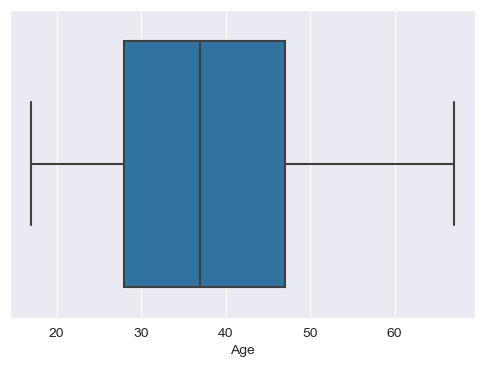

In [177]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=data_cleaned)

##### As we can see outliers are removed and our dataset is cleaned.

<AxesSubplot:>

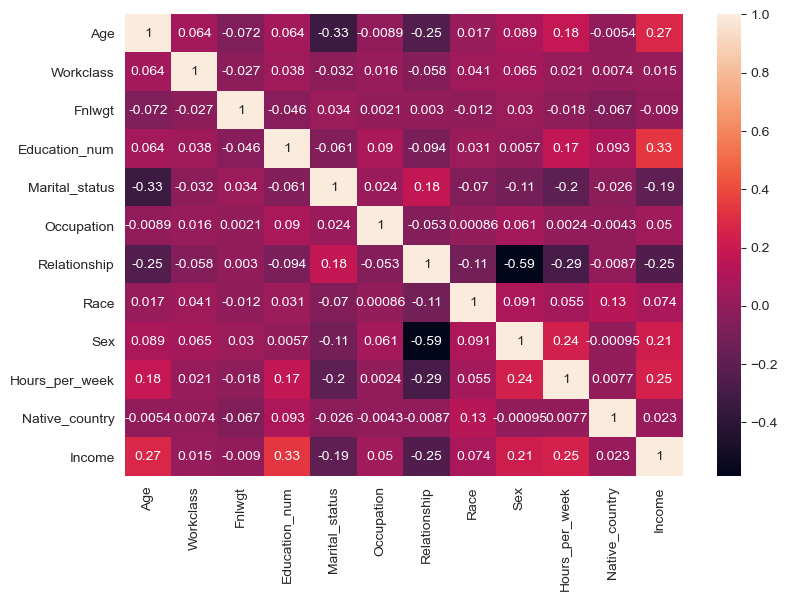

In [174]:
#Heatmap and Correlation

sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
corr = data_cleaned.corr()
sns.heatmap(corr, annot=True)

In [186]:
X = data_cleaned.drop(columns=['Income'])
y = data_cleaned['Income']

In [187]:
#SCALING FEATURE DATA
scalar = StandardScaler()
x_scaled=scalar.fit_transform(X)

In [188]:
#Splitting Data into training and testing

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=40)


In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,f1_score,PrecisionRecallDisplay,plot_confusion_matrix,precision_score,recall_score

#### MODEL TRAINING AND FINDING BEST MODEL


# Logistic Regression

In [225]:

rslt=[]

lr = LogisticRegression(C=10, fit_intercept=True, max_iter=1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr.score(x_train,y_train))
print('TESTING SCORE : ', lr.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.805161613630669
TESTING SCORE :  0.8046299544019643
ACCURACY : 0.8046299544019643
*****************************
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6436
           1       0.67      0.42      0.52      2117

    accuracy                           0.80      8553
   macro avg       0.75      0.68      0.70      8553
weighted avg       0.79      0.80      0.79      8553



# RANDOM FOREST CLASSIFIER

In [226]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.9998997744926084
TESTING SCORE :  0.8238045130363615
ACCURACY : 0.8238045130363615
*****************************
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      6436
           1       0.67      0.56      0.61      2117

    accuracy                           0.82      8553
   macro avg       0.77      0.74      0.75      8553
weighted avg       0.82      0.82      0.82      8553



# DECISION TREE CLASSIFIER

In [227]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.9999498872463042
TESTING SCORE :  0.7770372968549047
ACCURACY : 0.7770372968549047
*****************************
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6436
           1       0.55      0.55      0.55      2117

    accuracy                           0.78      8553
   macro avg       0.70      0.70      0.70      8553
weighted avg       0.78      0.78      0.78      8553



# GRADIENT BOOSTING CLASSIFIER

In [228]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb.score(x_train,y_train))
print('TESTING SCORE : ', gb.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8444500125281884
TESTING SCORE :  0.8347948088390038
ACCURACY : 0.8347948088390038
*****************************
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6436
           1       0.71      0.56      0.63      2117

    accuracy                           0.83      8553
   macro avg       0.79      0.74      0.76      8553
weighted avg       0.83      0.83      0.83      8553



# KNN

In [229]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', kn.score(x_train,y_train))
print('TESTING SCORE : ', kn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8682535705337008
TESTING SCORE :  0.8121127089909973
ACCURACY : 0.8121127089909973
*****************************
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6436
           1       0.64      0.56      0.59      2117

    accuracy                           0.81      8553
   macro avg       0.75      0.73      0.74      8553
weighted avg       0.81      0.81      0.81      8553



# SUPPORT VECTOR CLASSIFIER

In [230]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', svc.score(x_train,y_train))
print('TESTING SCORE : ', svc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8337759959909797
TESTING SCORE :  0.8232199228340933
ACCURACY : 0.8232199228340933
*****************************
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6436
           1       0.72      0.46      0.56      2117

    accuracy                           0.82      8553
   macro avg       0.78      0.70      0.73      8553
weighted avg       0.81      0.82      0.81      8553



In [231]:
result_df = pd.DataFrame({"ML Models":["Logistic Regression","Random Forest",
             "Decision Tree","Gradient Boosting","KNN","SVC"],"Score":rslt})
result_df

,ML Models,Score
0,Logistic Regression,0.804630
1,Random Forest,0.823805
2,Decision Tree,0.777037
3,Gradient Boosting,0.834795
4,KNN,0.812113
5,SVC,0.823220


In [233]:
#CROSS VALIDATION SCORE

mean_cv=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Random Forest','Decision Tree','Gradientboost','KNN','SVC']
models=[LogisticRegression(max_iter=1000),RandomForestClassifier(n_estimators=100),DecisionTreeClassifier(),
        GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=9),SVC()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,x_train,y_train,scoring = "accuracy",cv=3)
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

LogisticRegression(max_iter=1000)
RandomForestClassifier()
DecisionTreeClassifier()
GradientBoostingClassifier()
KNeighborsClassifier(n_neighbors=9)
SVC()


,CV Mean,Std
Logistic Regression,0.804309,0.006537
Random Forest,0.825357,0.001411
Decision Tree,0.769481,0.001779
Gradientboost,0.837835,0.003465
KNN,0.815585,0.002702
SVC,0.825457,0.005038


In [234]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [239]:
print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test,lr.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rfc.predict(x_test)))
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))
print('ROC_AUC_SCORE_GRADIENT_BOOSTING :',roc_auc_score(y_test,gb.predict(x_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,kn.predict(x_test)))
print('ROC_AUC_SCORE_SVC :',roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.7007190525777152
ROC_AUC_SCORE_RANDOM_FOREST : 0.7356820676561607
ROC_AUC_SCORE_DECISION_TREE : 0.7001658787529875
ROC_AUC_SCORE_GRADIENT_BOOSTING : 0.741399787391013
ROC_AUC_SCORE_KNN : 0.7266453049729424
ROC_AUC_SCORE_SVC : 0.7016926297019042


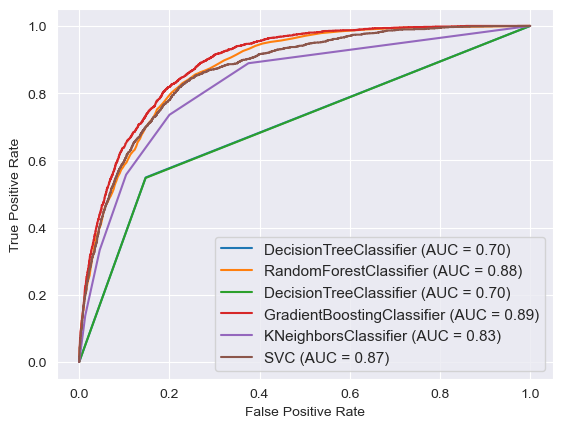

In [241]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### HENCE ,GRADIENT BOOSTING CLASSIFIER IS THE BEST FITTED MODEL AS PER ROC_AUC_SCORE

- HYPERPARAMETER TUNING IN GRADIENT BOOSTING

In [243]:


from sklearn.model_selection import GridSearchCV

In [265]:
params = {
    'max_depth':(2,3),
    'n_estimators':(100,150,200)
}

In [266]:
grid = GridSearchCV(GradientBoostingClassifier()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': (2, 3), 'n_estimators': (100, 150, 200)})

In [267]:
best_param=grid.best_params_
best_param

{'max_depth': 2, 'n_estimators': 200}

In [268]:
gb_tuned=GradientBoostingClassifier(n_estimators=200,max_depth=2)
gb_tuned.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [271]:
y_pred_gb = gb_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb_tuned.score(x_train,y_train))
print('TESTING SCORE : ', gb_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred_gb))

TRAINING SCORE :  0.8419944875970935
TESTING SCORE :  0.837016251607623
ACCURACY : 0.837016251607623
*****************************
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6436
           1       0.72      0.56      0.63      2117

    accuracy                           0.84      8553
   macro avg       0.79      0.74      0.76      8553
weighted avg       0.83      0.84      0.83      8553



 0 = Income <=50K
1 = Income > 50K


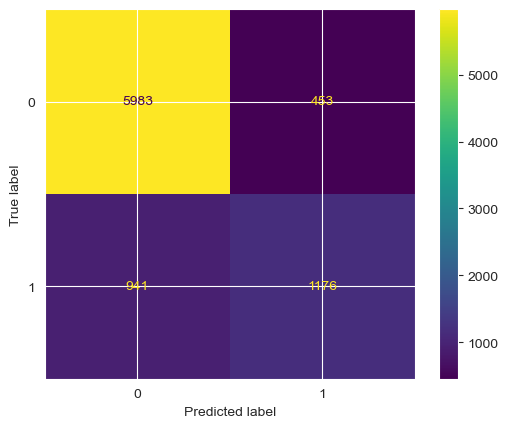

In [277]:
plot_confusion_matrix(gb_tuned,x_test,y_test)
print(' 0 = Income <=50K')
print('1 = Income > 50K')

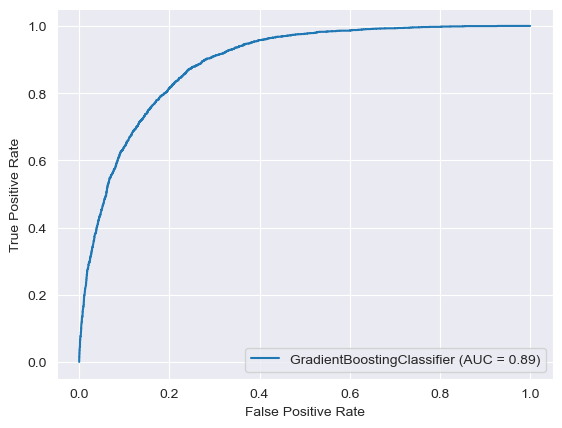

In [278]:
plot_roc_curve(gb_tuned,x_test,y_test)

# EFFICIENCY ACHIEVED:

- F1 score is increased by 1%
- Accuracy achieved on testing, 0.84 i.e 84% and increased by 0.003
- AUC = 0.89

In [279]:
#Model Saving

import joblib
joblib.dump(gb_tuned,'Census_Income.pkl')

['Census_Income.pkl']